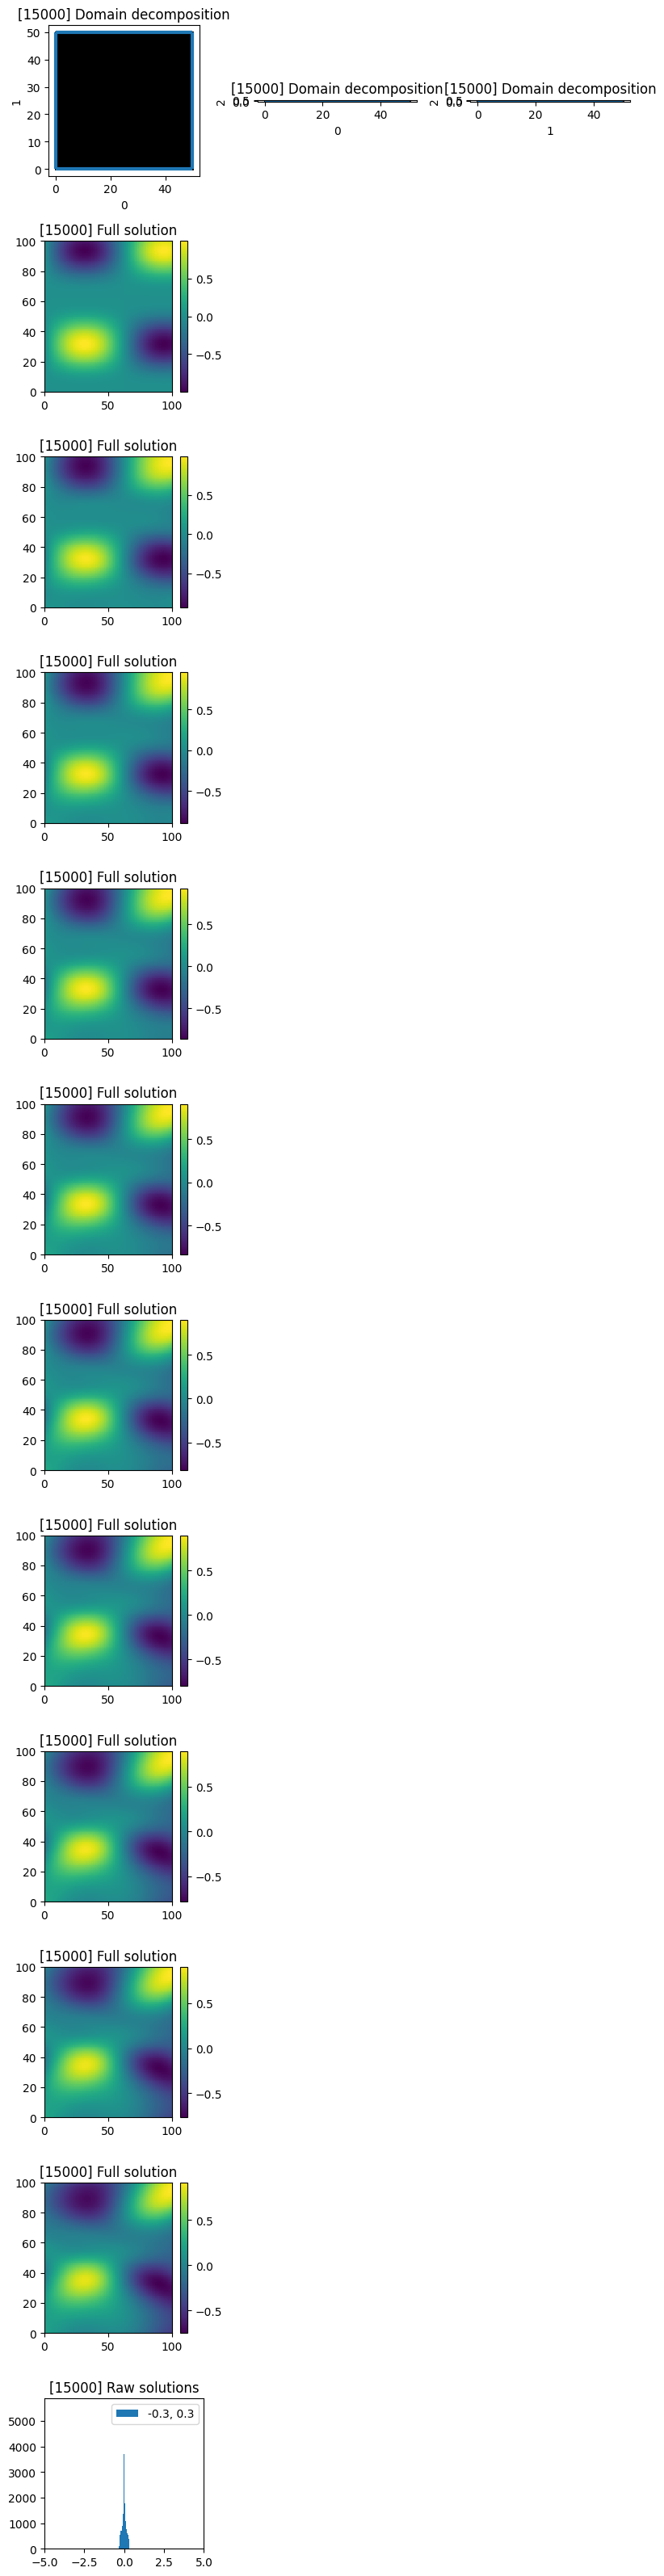

[INFO] 2024-12-10 17:12:26 - [i: 16000/100000] loss: 0.3018 rate: 59.1 elapsed: 0.09 hr test


KeyboardInterrupt: 

In [12]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import CahnHilliard
from fbpinns.decompositions import MultilevelRectangularDecompositionND
from fbpinns.networks import FCN
from fbpinns.schedulers import AllActiveSchedulerND, LineSchedulerRectangularND, PlaneSchedulerRectangularND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

XMIN, XMAX, YMIN, YMAX, TMIN, TMAX = 0.0, 50.0, 0.0, 50.0, 0.0, 0.5

subdomain_xss = [[np.array([XMAX / 2]), np.array([YMAX / 2]), np.array([TMAX / 2])]] #+\
    # [[np.linspace(0,XMAX,n_),np.linspace(0,TMAX,n_)] for n_ in (5,)] +\
    # [[np.linspace(0,XMAX,n_),np.linspace(0,TMAX,n_)] for n_ in (10,)]
subdomain_wss = [[np.array([XMAX]), np.array([YMAX]), np.array([TMAX])]] #+\
    # [get_subdomain_ws(subdomain_xss[1], w)] +\
    # [get_subdomain_ws(subdomain_xss[2], w)]

c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([XMIN,YMIN,TMIN]),
        xmax=np.array([XMAX,YMAX,TMAX])
    ),
    problem=CahnHilliard,
    problem_init_kwargs = dict(
        sdt=0.01,
        gamma=0.5,
    ),
    decomposition=MultilevelRectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xss=subdomain_xss,
        subdomain_wss=subdomain_wss,
        unnorm=(0.,3.),
    ),
    network=FCN,
    network_init_kwargs = dict(
        layer_sizes = (3, 32, 1),
    ),
    optimiser_kwargs=dict(learning_rate=1e-3),
    scheduler = PlaneSchedulerRectangularND,
    scheduler_kwargs = dict(
        point=[0.], iaxes=[0, 1],
    ),
    ns=((100,100,10),),
    n_test=(100,100,10),
    n_steps=100_000,
    clear_output=True,
)

run = FBPINNTrainer(c)
all_params = run.train()